

---


**Trabajo Práctico Final -  Grupo n° 5 - Archivo N° 1 : EDA**


Universidad Tecnológica Nacional, Buenos Aires


Ingeniería Industrial


Ciencia de Datos - Curso I5521


---


**Integrantes:**

Nombre: Leandro Omelanchuc

Legajo: 172880-5


Nombre: Franco Vanella

Legajo: 166394-0


---




## **Objetivos del archivo**
- EDA de Dataset provisto

---
## **Descripcion de Variables**


Formato --> "Variable : Significado"

*   age : Edad del cliente
*   job : Tipo de empleo del cliente
*   martial status : Estado civil
*   education : Educacion maxima alcanzada por el cliente
*   Credit : Si tiene deuda de crédito o no
*   balance : Promedio de saldo en la cuenta en el año
*   housing loan : Si tiene prestamos hipotecrios o no
*   Persona loan : Si tiene prestamos o no
*   contact : tipo con contacto del cliente
*   Last Contact Day : Ultimo dia de contacto con el cliente en el mes
*   Last Contact Month : Ultimo mes de contacto con el cliente en el año
*   Last Contact Duration : Duracion del ultimo contacto con el cliente medido en segundos
*   campaign : Cantidad de contactos al cliente durante esta campania, incluye el último contacto.
*   pdays : Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior. -1 significa que no hubo contacto previo
*   previous : Cantidad de contactos previos a esta campania para cada cliente
*   poutcome : Performance de la campania de marketing anterior para este cliente
---

























In [ ]:
## Importo librerías EDA ##


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Upload Dataset Original ##
from google.colab import drive
drive.mount('/content/drive')
df_clients = pd.read_csv('/content/drive/MyDrive/Ciencia de datos/TP Final/bank_subscription.csv', delimiter= ";" )

df_clients.head()





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,NaN,NaN,NaN,no,2143.0,yes,NaN,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,NaN,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,NaN,0,unknown,0
3,47.0,NaN,married,unknown,no,1506.0,NaN,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,NaN,0,unknown,0


---
**Limpieza de Dataset**

Modificamos aquellas lineas con datos no validos, null's o inconsistentes con los valores aceptados para esas features


---


In [ ]:
## Verificacion de nulls y formatos en las columnas ##

df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    40238 non-null  float64
 1   Job                    40238 non-null  object 
 2   Marital Status         40238 non-null  object 
 3   Education              40238 non-null  object 
 4   Credit                 40238 non-null  object 
 5   Balance (euros)        40238 non-null  float64
 6   Housing Loan           37525 non-null  object 
 7   Personal Loan          37525 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  37525 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  37525 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

In [ ]:
## Verificacion de valores NaN en las columnas ##

df_clients.isna().sum()

,0
Age,4973
Job,4973
Marital Status,4973
Education,4973
Credit,4973
Balance (euros),4973
Housing Loan,7686
Personal Loan,7686
Contact,0
Last Contact Day,0


In [ ]:
(df_clients == 'unknown').sum()


,0
Age,0
Job,257
Marital Status,0
Education,1666
Credit,0
Balance (euros),0
Housing Loan,0
Personal Loan,0
Contact,13020
Last Contact Day,0


In [ ]:

## Limpiza Dataset ##

# === 1. Copia de trabajo ===
df = df_clients.copy()

# === 2. IMPUTACIÓN NUMÉRICA (mediana) ===
num_cols = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Pdays']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# === 3. IMPUTACIÓN CATEGÓRICA (moda) ===
cat_cols = ['Job', 'Marital Status', 'Education']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# === 4. IMPUTACIÓN DE VARIABLES BINARIAS (asumir "no") ===
df['Housing Loan'] = df['Housing Loan'].fillna('no')
df['Personal Loan'] = df['Personal Loan'].fillna('no')
df['Credit'] = df['Credit'].fillna('no')

# === 5. Verificar imputación ===
print("\nCantidad de NaN después de imputar:")
print(df.isna().sum())

df_eda = df.copy()
df_eda.shape
df_eda.head()


Cantidad de NaN después de imputar:
Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64


,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58.0,blue-collar,married,secondary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,0
1,44.0,technician,single,secondary,no,448.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,0
3,47.0,blue-collar,married,unknown,no,1506.0,no,no,unknown,5,may,92.0,1,-1.0,0,unknown,0
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,180.0,1,-1.0,0,unknown,0


---
**Validacion de datos por feature**

Se verifica qué valores toman los datos refinados para su parametrizacion o separacion binaria por feature categorica


---

In [ ]:
## Validacion de valores por features ##

Features_Dataset = df_eda.columns.to_list()

Features_Dataset

['Age',
 'Job',
 'Marital Status',
 'Education',
 'Credit',
 'Balance (euros)',
 'Housing Loan',
 'Personal Loan',
 'Contact',
 'Last Contact Day',
 'Last Contact Month',
 'Last Contact Duration',
 'Campaign',
 'Pdays',
 'Previous',
 'Poutcome',
 'Subscription']

In [ ]:
## verificacion de valores ##

for feature in Features_Dataset:
  print(feature)
  print(df_eda[feature].unique())

Age
[58. 44. 33. 47. 35. 28. 42. 43. 41. 29. 53. 57. 51. 45. 60. 56. 32. 25.
 40. 39. 52. 36. 49. 59. 37. 50. 54. 55. 48. 24. 38. 46. 30. 34. 31. 23.
 26. 61. 22. 27. 21. 20. 66. 62. 83. 75. 67. 70. 65. 68. 64. 72. 71. 19.
 76. 69. 85. 63. 90. 82. 73. 74. 78. 80. 94. 79. 77. 95. 81. 18. 89. 84.
 86. 87. 92. 93. 88.]
Job
['blue-collar' 'technician' 'entrepreneur' 'unknown' 'management'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital Status
['married' 'single' 'divorced']
Education
['secondary' 'unknown' 'tertiary' 'primary']
Credit
['no' 'yes']
Balance (euros)
[2.1430e+03 4.4800e+02 2.0000e+00 ... 8.2050e+03 1.4204e+04 1.6353e+04]
Housing Loan
['yes' 'no']
Personal Loan
['no' 'yes']
Contact
['unknown' 'cellular' 'telephone']
Last Contact Day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Last Contact Month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Last Contact Dur

In [ ]:
cat_cols = df_eda.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nTop valores por columnas categóricas:")
for c in cat_cols:
    print(f"\n{c}:")
    print(df_eda[c].value_counts().head(10))


Top valores por columnas categóricas:

Job:
Job
blue-collar      13680
management        8394
technician        6748
admin.            4598
services          3700
retired           2000
self-employed     1414
entrepreneur      1315
unemployed        1171
housemaid         1107
Name: count, dtype: int64

Marital Status:
Marital Status
married     29195
single      11396
divorced     4620
Name: count, dtype: int64

Education:
Education
secondary    25618
tertiary     11830
primary       6097
unknown       1666
Name: count, dtype: int64

Credit:
Credit
no     44484
yes      727
Name: count, dtype: int64

Housing Loan:
Housing Loan
no     24394
yes    20817
Name: count, dtype: int64

Personal Loan:
Personal Loan
no     39222
yes     5989
Name: count, dtype: int64

Contact:
Contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

Last Contact Month:
Last Contact Month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     26

Subscription
0    39922
1     5289
Name: count, dtype: int64

Distribución relativa:
Subscription
0    0.883015
1    0.116985
Name: proportion, dtype: float64


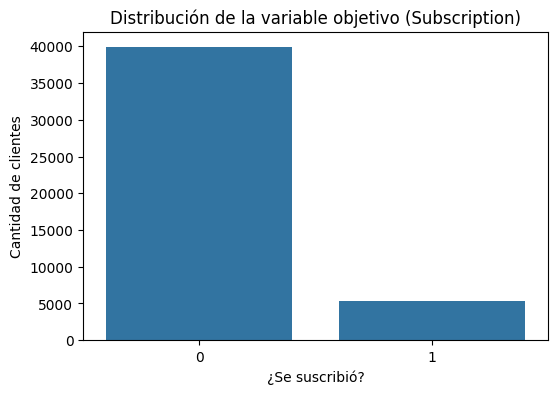

In [ ]:
print(df_eda['Subscription'].value_counts())
print("\nDistribución relativa:")
print(df_eda['Subscription'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(data=df_eda, x='Subscription')
plt.title("Distribución de la variable objetivo (Subscription)")
plt.xlabel("¿Se suscribió?")
plt.ylabel("Cantidad de clientes")
plt.show()

Dado que está MUY desbalanceado, tomo nota para modelado futuro:

*Usar ROC-AUC

*Evitar "accuracy" como métrica ya que si tengo un modelo que predice solamente que una persona no se sucribe (modelo absurdo) tendría un acurracy del 88%

*Aplicar técnicas de balanceo (SMOTE, class weight, etc.)

CONCLUSION: La variable objetivo está muy desbalanceada.

In [ ]:
df_eda[['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']].describe()




,Age,Balance (euros),Last Contact Duration,Campaign,Pdays,Previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.717502,1266.051558,245.164274,2.763841,33.046935,0.580323
std,10.048064,2919.353481,236.735702,3.098021,92.153948,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,105.000000,118.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,47.000000,1232.500000,279.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


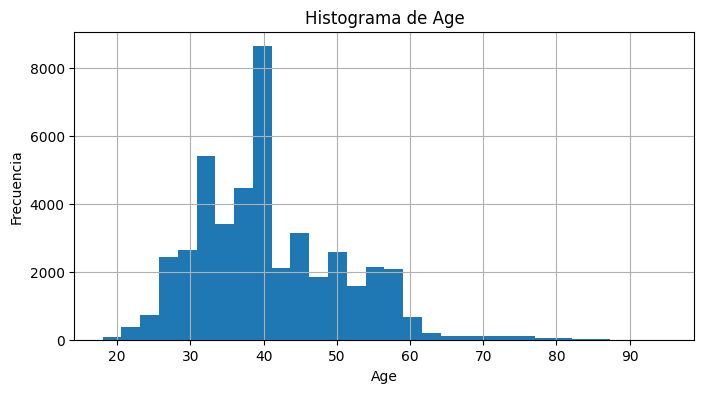

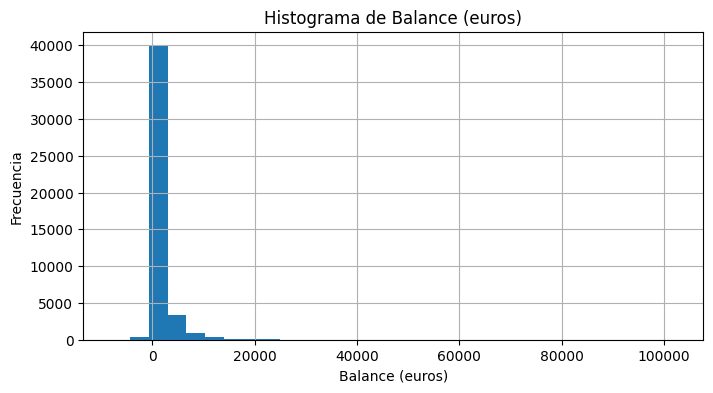

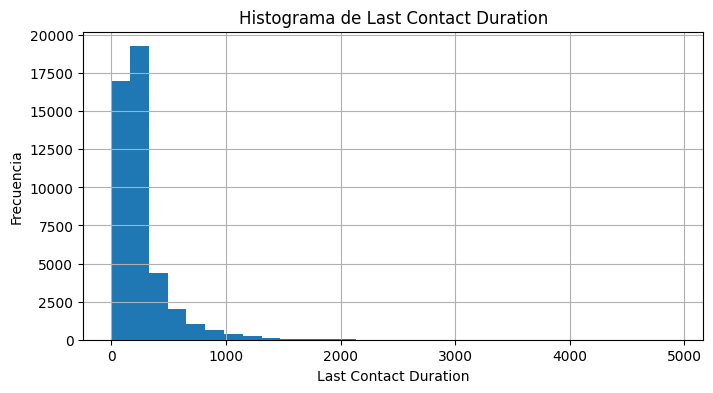

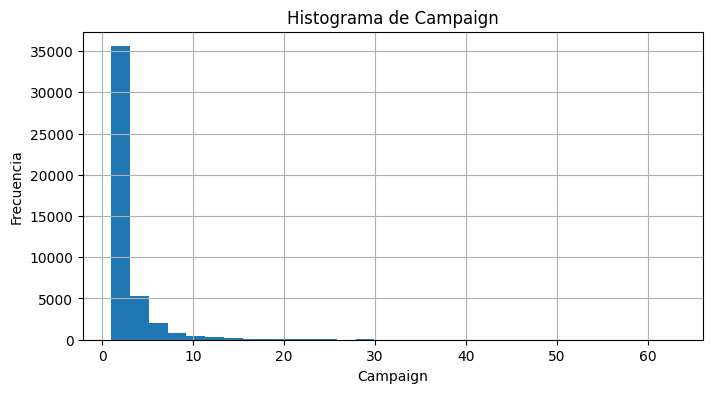

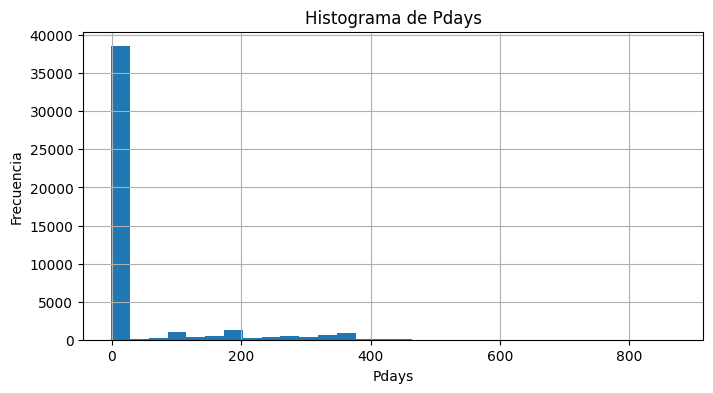

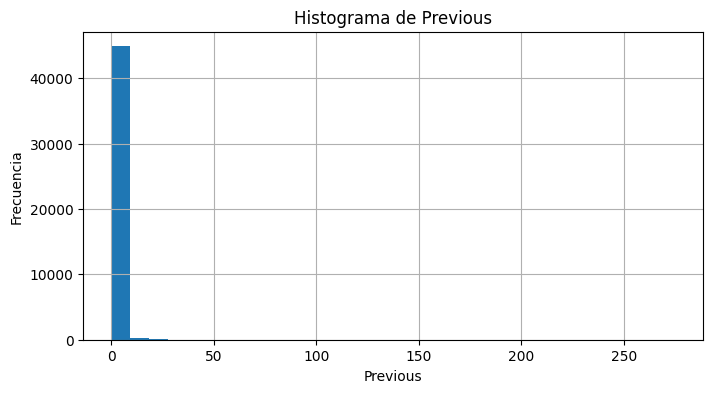

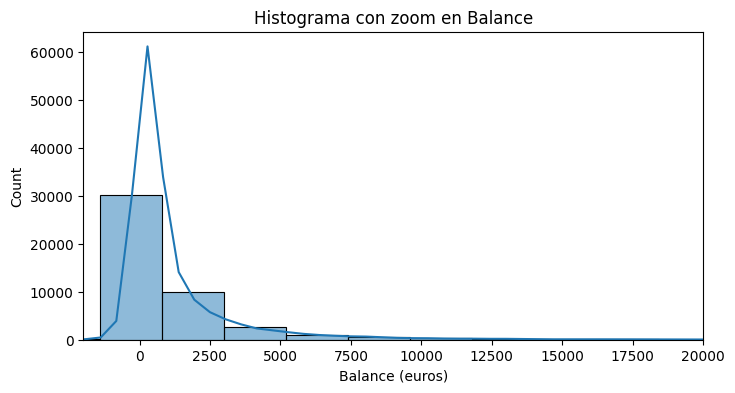

In [ ]:

num_cols = ['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']

for col in num_cols:
    plt.figure(figsize=(8,4))
    df_eda[col].hist(bins=30)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df_eda['Balance (euros)'], bins=50, kde=True)
plt.xlim(-2000, 20000)  # Zoom sobre esta región
plt.title("Histograma con zoom en Balance")
plt.show()





Se puede observar lo siguiente:
*La variable Age tiene diferentes picos u olas con una media de 40 años.
*La variable pDays tiene un pico gigante en -1
*La variable Campaign tiene la mayoria de los valores en 1-5
*La variable Balance muy sesgada hacia la derecha
*La variable Previous en su mayoria esta en 0.
*La mayoria de las llamadas tienen poca duración



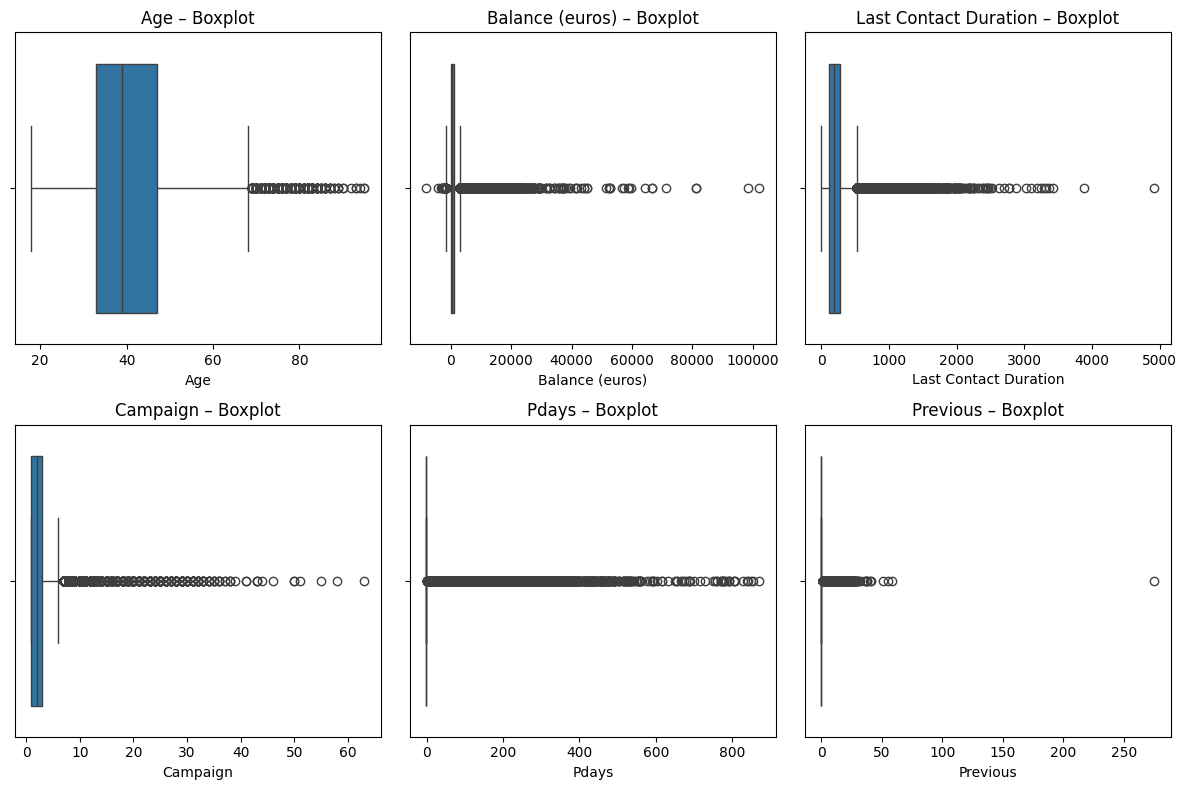

In [ ]:

num_cols = ['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_eda[col])
    plt.title(f"{col} – Boxplot")
plt.tight_layout()
plt.show()


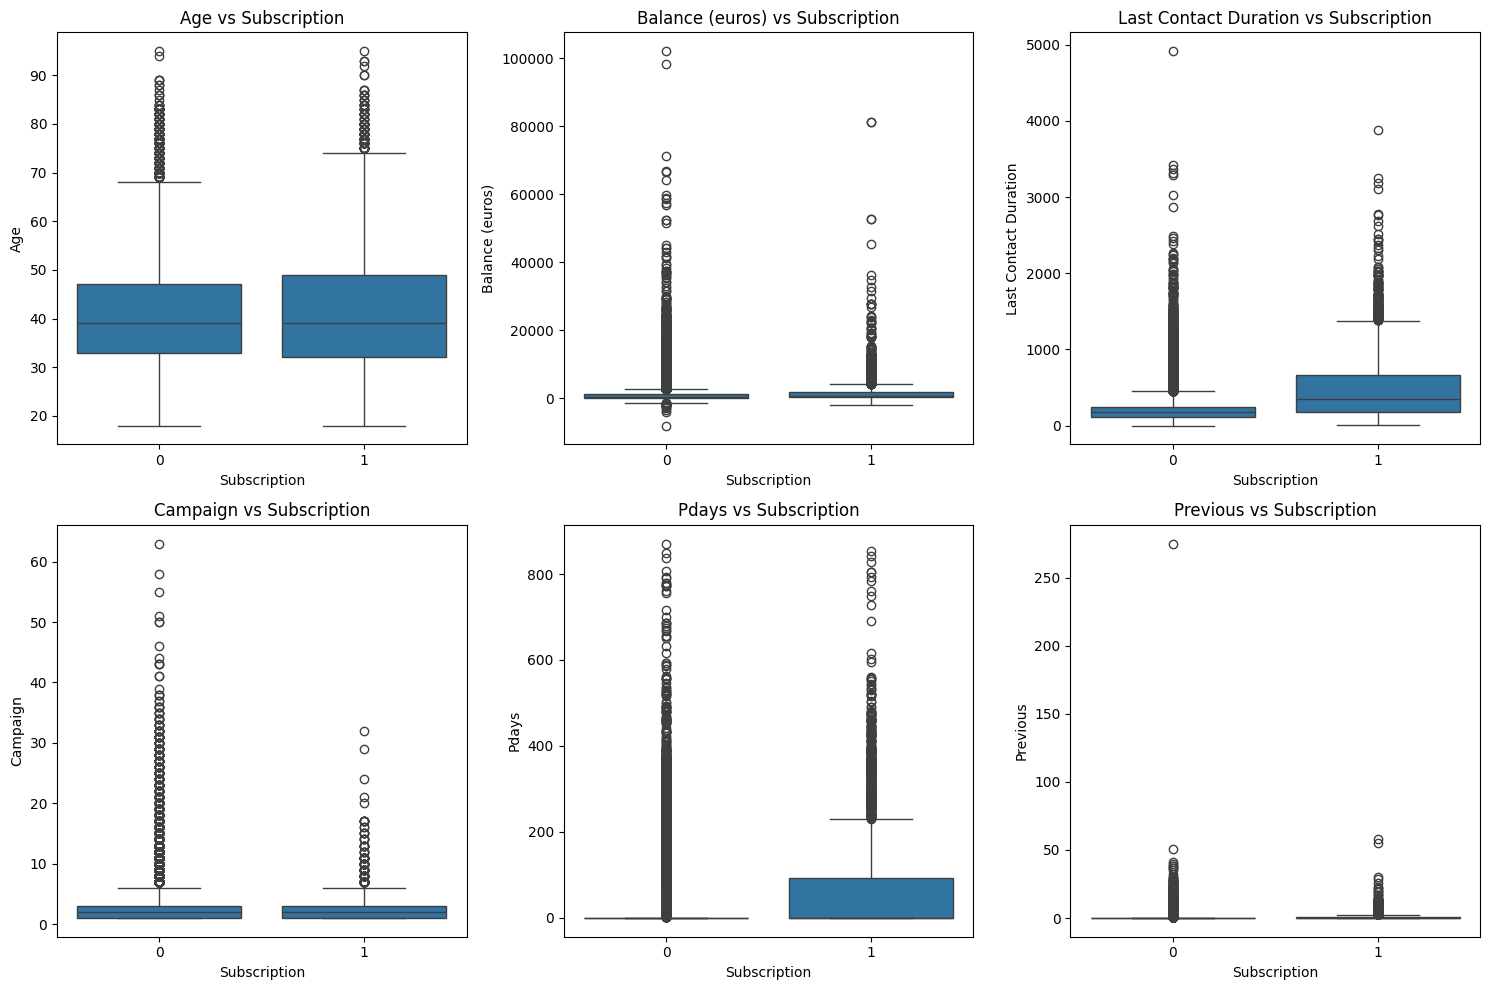

In [ ]:
#Boxplot Comparativo
num_cols = ['Age','Balance (euros)','Last Contact Duration','Campaign','Pdays','Previous']

plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_eda, x='Subscription', y=col)
    plt.title(f"{col} vs Subscription")

plt.tight_layout()
plt.show()

Observando los graficos comparativos, en principio la variable mas predictiva es la "Last Contact Duration" donde las llamadas de mayor duracion aumentan la porpabilidad de suscribirse. Sin embargo esta variable generera data leakage ya que se conoce despues del contacto por lo que en campañas reales no deberia usarla para predecir antes de llamar.

*Los clientes con Balance mas alto tiende a suscribirse, pero tiene altos outliers.

*Los que fueron contactados hace poco, tienen mayor tasa de suscripcion, pero la relacion es ruidosa ya que hay muchos con valor -1 (Pdays).

*La variable Previous aporta poca informacion.

*Cuanto mas contactos le hicieron al cliente, puede haber una menor probabilidad de subscripicon (Campaign)

In [ ]:
df_eda.groupby("Subscription")[num_cols].mean()


,Age,Balance (euros),Last Contact Duration,Campaign,Pdays,Previous
Subscription,,,,,,
0,40.627173,1214.731677,214.078027,2.846350,30.077050,0.502154
1,41.399319,1653.420117,479.806958,2.141047,55.463982,1.170354


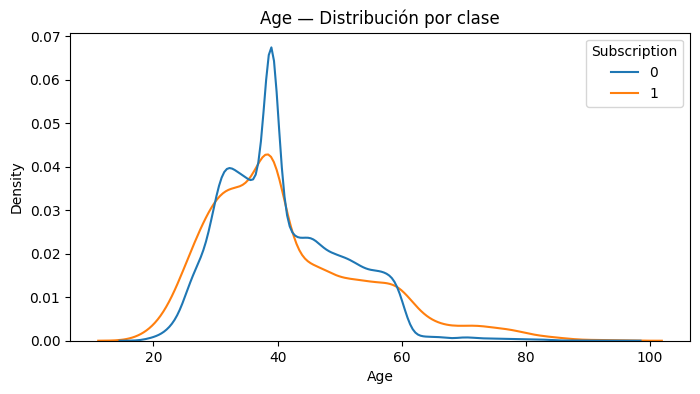

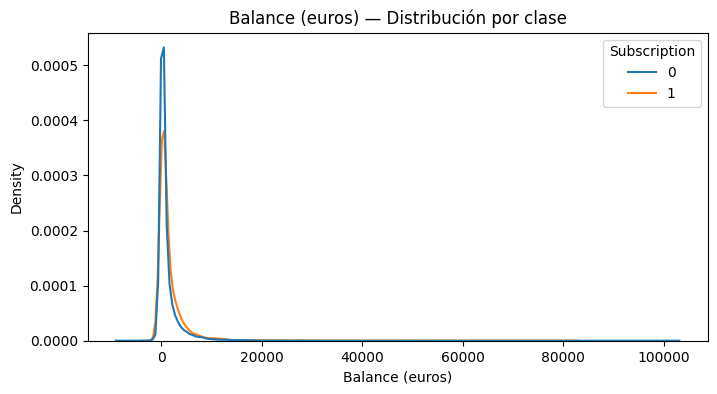

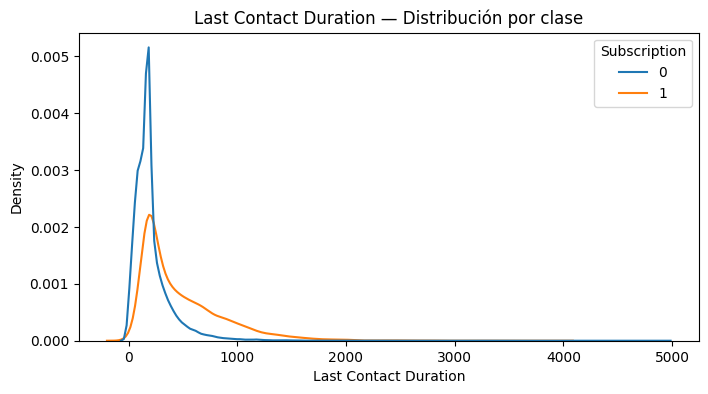

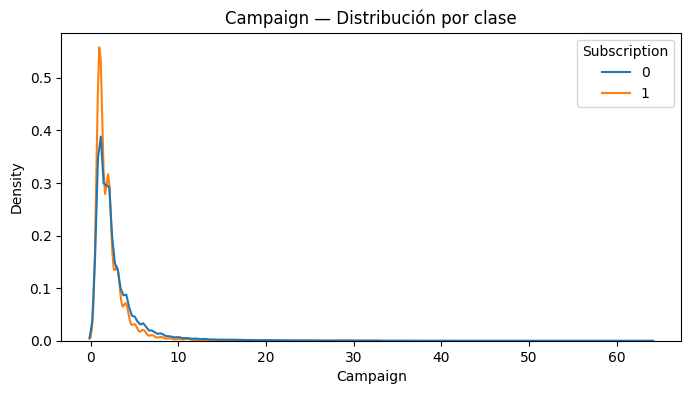

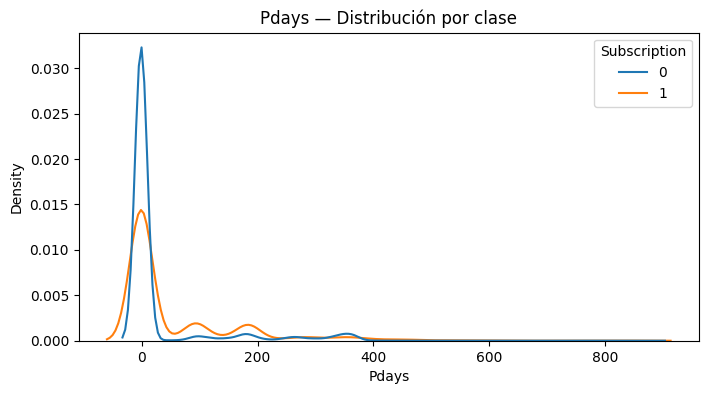

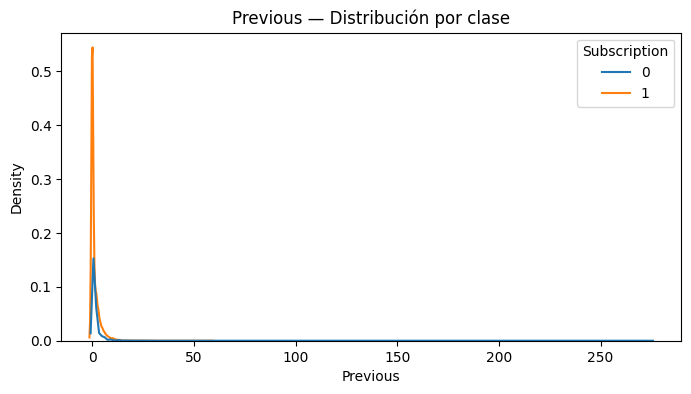

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df_eda, x=col, hue='Subscription', common_norm=False)
    plt.title(f"{col} — Distribución por clase")
    plt.show()


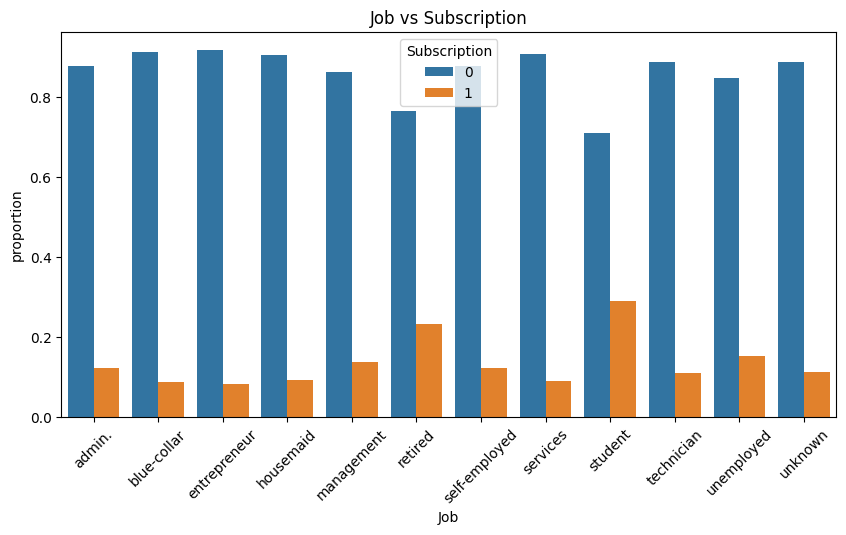

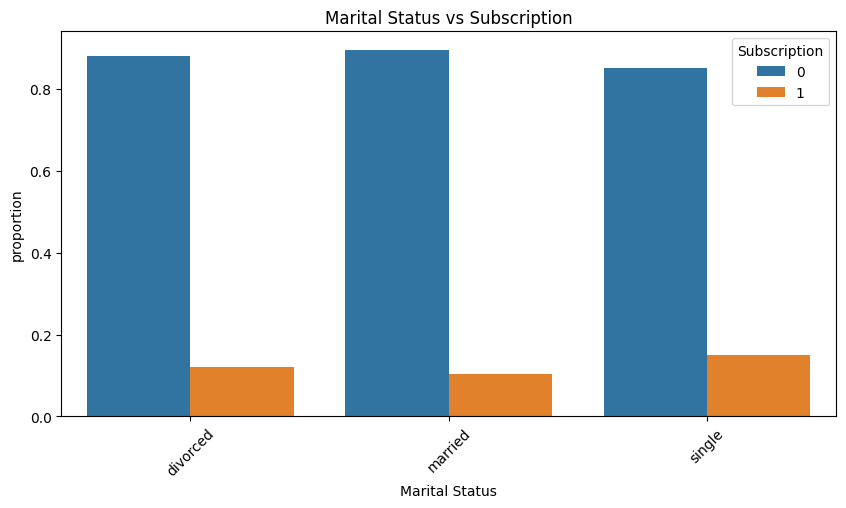

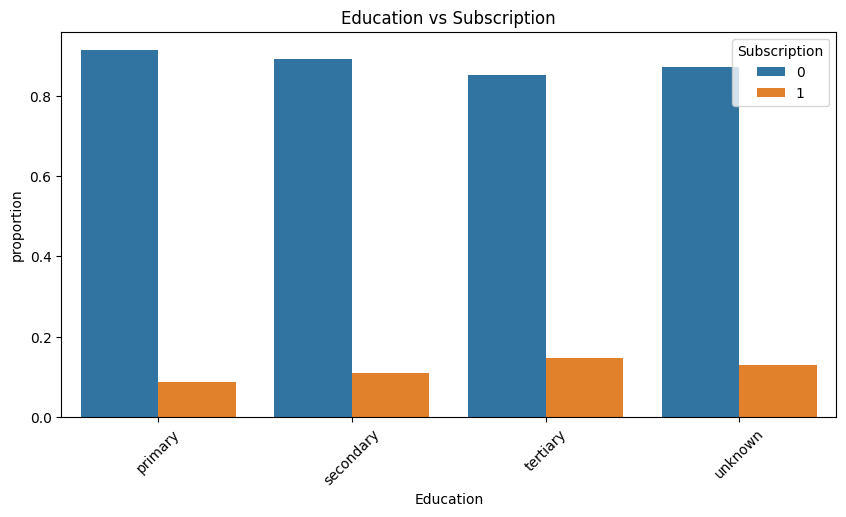

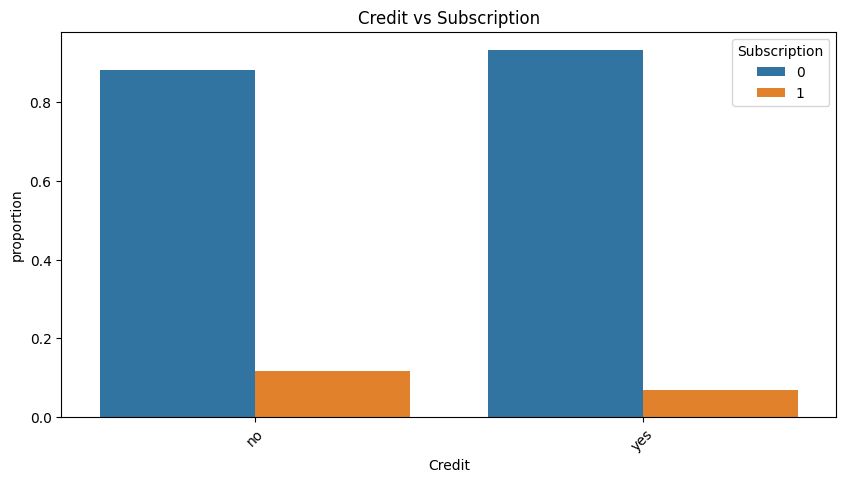

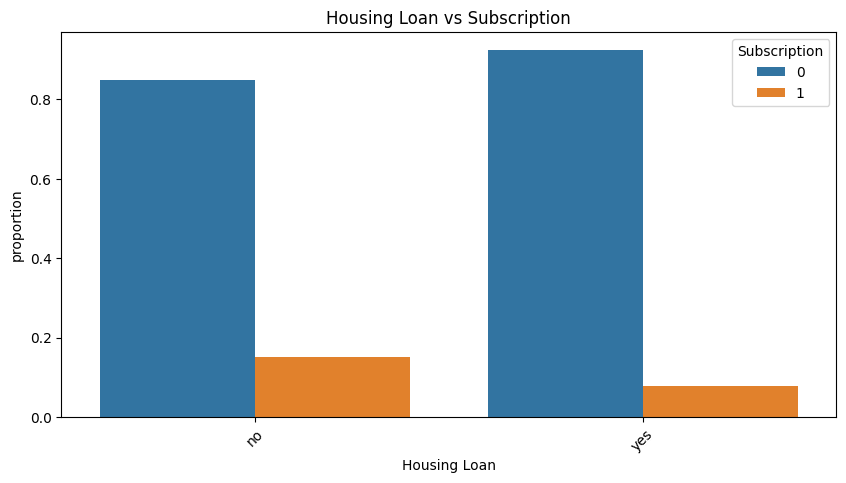

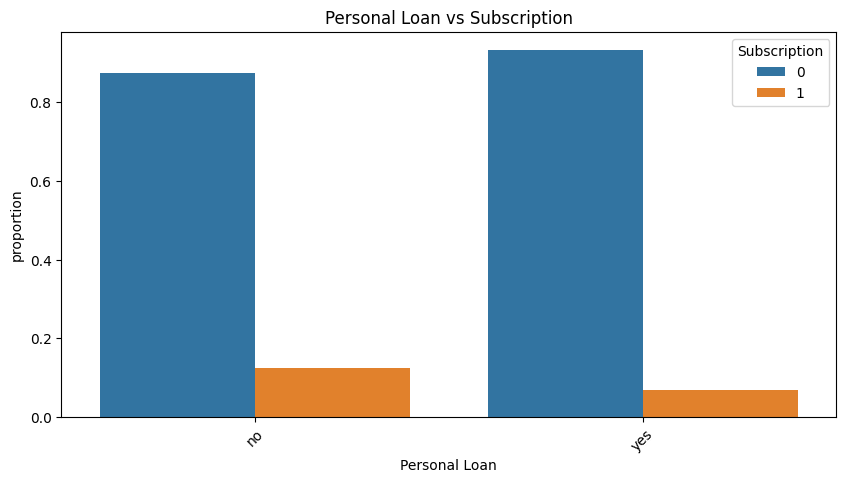

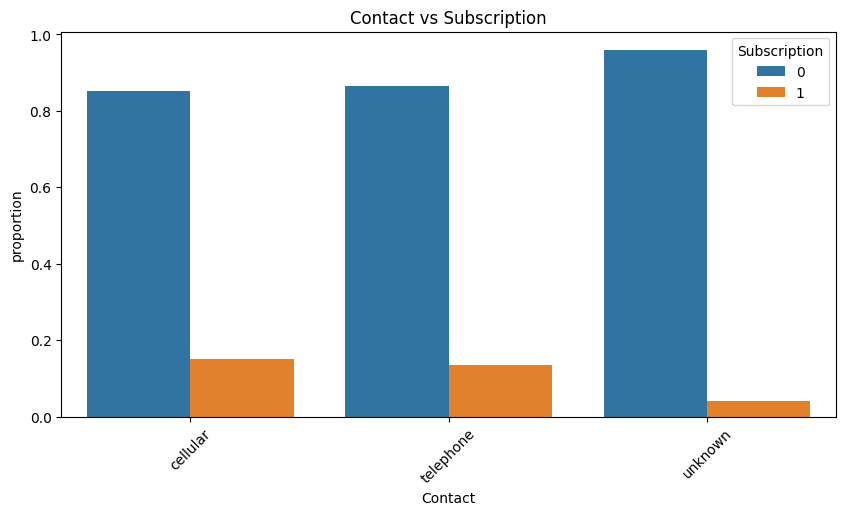

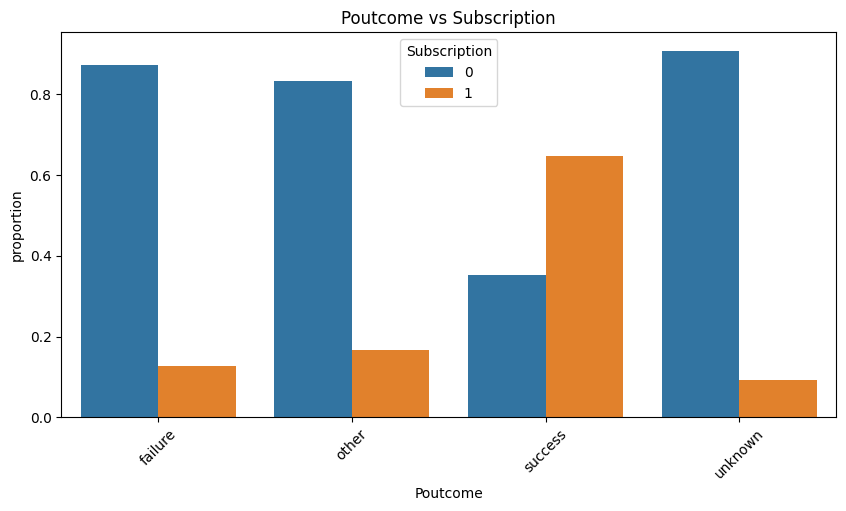

In [ ]:
#Variable Categorica vs Suscription
cat_vars = ['Job','Marital Status','Education','Credit','Housing Loan','Personal Loan','Contact','Poutcome']

for col in cat_vars:
    plt.figure(figsize=(10,5))
    prop = (df_eda.groupby(col)['Subscription']
                   .value_counts(normalize=True)
                   .rename('proportion')
                   .reset_index())
    sns.barplot(data=prop, x=col, y='proportion', hue='Subscription')
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.show()


Como conclusiones se puede observar:

*Las personas con mayor proporcion de acceder a la campaña son los estudiantes y retirados

*Las personas con estudios terciarios tienen mayor proporcion de suscrpicion

*La Varibale Poutcome tiene alto impacto: “success” dispara la probabilidad de suscribirse.

*Aquellas que no tienen un prestamo personal tienen mayor proporcion en suscripciones, lo mismo para aquellos que no tienen seguro para el hogar.


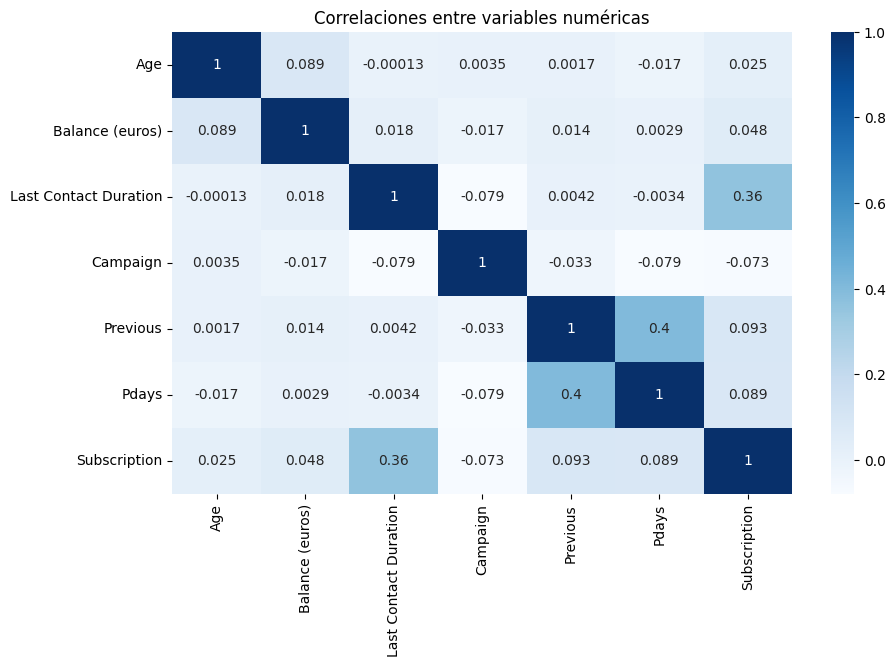

In [ ]:
#Correlaciones Numericas
num_vars = ['Age', 'Balance (euros)', 'Last Contact Duration', 'Campaign', 'Previous', 'Pdays', 'Subscription']
plt.figure(figsize=(10,6))
sns.heatmap(df_eda[num_vars].corr(), annot=True, cmap='Blues')
plt.title('Correlaciones entre variables numéricas')
plt.show()


La variable más correlacionada con la suscripción suele ser duration, pero tiene un problema de data leakage (se utiliza solo después de saber si aceptó). Igual sirve como señal exploratoria.

*Pdays y Previous al final correlaciona poco

In [ ]:
# Feature Engineering preliminar
df_eda_2 = df_eda.copy()
#Agrupar categorías poco frecuentes de Education (unknown + primary)
df_eda_2['Education'] = df_eda_2['Education'].replace({
    'unknown': 'low_education',
    'primary': 'low_education'
})


#Crear Variable Binaria para aquellas personas contactadas por primera vez
df_eda_2['contact_first_time'] = (df_eda_2['Pdays'] == -1).astype(int)

#Deteccion de Outliers en Balance
Q1 = df_eda_2['Balance (euros)'].quantile(0.25)
Q3 = df_eda_2['Balance (euros)'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_eda_2['balance_outlier'] = (
    (df_eda_2['Balance (euros)'] < lower) |
    (df_eda_2['Balance (euros)'] > upper)
).astype(int)

#Crear variable Duración Log-transformada ya que es altamente asimetrica
df_eda_2['log_duration'] = np.log1p(df_eda_2['Last Contact Duration'])

df_eda_2.info()
df_eda_2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    45211 non-null  float64
 1   Job                    45211 non-null  object 
 2   Marital Status         45211 non-null  object 
 3   Education              45211 non-null  object 
 4   Credit                 45211 non-null  object 
 5   Balance (euros)        45211 non-null  float64
 6   Housing Loan           45211 non-null  object 
 7   Personal Loan          45211 non-null  object 
 8   Contact                45211 non-null  object 
 9   Last Contact Day       45211 non-null  int64  
 10  Last Contact Month     45211 non-null  object 
 11  Last Contact Duration  45211 non-null  float64
 12  Campaign               45211 non-null  int64  
 13  Pdays                  45211 non-null  float64
 14  Previous               45211 non-null  int64  
 15  Po

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription,contact_first_time,balance_outlier,log_duration
0,58.0,blue-collar,married,secondary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,0,1,0,5.568345
1,44.0,technician,single,secondary,no,448.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,0,1,0,5.023881
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,0,1,0,4.343805
3,47.0,blue-collar,married,low_education,no,1506.0,no,no,unknown,5,may,92.0,1,-1.0,0,unknown,0,1,0,4.532599
4,33.0,unknown,single,low_education,no,1.0,no,no,unknown,5,may,180.0,1,-1.0,0,unknown,0,1,0,5.198497


---
Guardado de archivos de datasets creados durante el EDA

---

In [ ]:
## Backup fisico de datasets generados ##

df_eda_2.to_csv('/content/drive/MyDrive/Ciencia de datos/TP Final/df_eda_2.csv', index=False)
df_eda.to_csv('/content/drive/MyDrive/Ciencia de datos/TP Final/df_eda.csv', index=False)